# Assignment 1.2

In this assignment, you will be given an integer programming problem. Your tasks are as follows:

1. **Model the Problem**: Formulate the given problem as an integer programming model. Define the decision variables, objective function, and constraints clearly.

2. **Implement in PULP**: Use the PULP library in Python to implement your integer programming model. Ensure that your code is well-documented and follows best practices.

3. **Validate the Solution**: Solve the model using PULP and validate the solution. Check if the solution meets all the constraints and discuss the results.

Make sure to include your code and explanations in the notebook.

## Student Data

- **Student Name**: René Guzmán Pérez
- **Student ID**: 1849342

## Problem Statement

A university is organizing a student exchange program and needs to assign students to different universities abroad. Each student has preferences for certain universities, and each university has a limited number of available slots. Additionally, the university wants to ensure a balanced distribution of students across different countries while minimizing dissatisfaction.

We have a total of 20 students (Student_1, Student_2, ..., \student_20) and 4 Universities (University_A, University_B, University_C, and University_D).

The preference for each student is given in the following:

- Student_1: ['University_D', 'University_A', 'University_B']
- Student_2: ['University_D', 'University_A', 'University_B']
- Student_3: ['University_B', 'University_D', 'University_A']
- Student_4: ['University_D', 'University_B', 'University_C']
- Student_5: ['University_D', 'University_B', 'University_C']
- Student_6: ['University_C', 'University_A', 'University_D']
- Student_7: ['University_C', 'University_B', 'University_A']
- Student_8: ['University_C', 'University_D', 'University_A']
- Student_9: ['University_D', 'University_C', 'University_B']
- Student_10: ['University_B', 'University_A', 'University_D']
- Student_11: ['University_D', 'University_A', 'University_C']
- Student_12: ['University_B', 'University_A', 'University_D']
- Student_13: ['University_C', 'University_B', 'University_D']
- Student_14: ['University_C', 'University_B', 'University_A']
- Student_15: ['University_D', 'University_A', 'University_B']
- Student_16: ['University_C', 'University_B', 'University_D']
- Student_17: ['University_C', 'University_D', 'University_B']
- Student_18: ['University_B', 'University_D', 'University_A']
- Student_19: ['University_C', 'University_B', 'University_D']
- Student_20: ['University_D', 'University_A', 'University_C']

The available slots at each university are:
- University_A: 5
- University_B: 5
- University_C: 5
- University_D: 5

## Instruction

1. **Propose a Model**: Formulate the problem as an integer programming model. Define the decision variables, objective function, and constraints clearly.

2. **Solve with PULP**: Implement the integer programming model using the PULP library in Python. Ensure that your code is well-documented and follows best practices. Solve the model to find the optimal assignment of students to universities.

3. **Analyze the Solution**: Validate the solution obtained from PULP. Check if the solution meets all the constraints (e.g., each university's slot limit and balanced distribution). Discuss the results, including the total dissatisfaction and how well the students' preferences were satisfied.

4. **Altering the Problem**: Imagine that the slots available at each university is only 3. Can your model handle this case?


# Mathematical Formulation

**Context.** Assign 20 students to 4 universities while respecting capacity limits and **minimizing dissatisfaction** according to their stated preferences (1st, 2nd, 3rd).

**Sets and parameters**
- Students: S = {Student_1, …, Student_20}
- Universities: U = {University_A, University_B, University_C, University_D}
- Capacity per university: cap[u]
- Dissatisfaction costs c[s,u]:
  - 0 if u is the 1st choice of s
  - 1 if u is the 2nd choice of s
  - 2 if u is the 3rd choice of s
  - 10 if u is not in the top-3 of s

**Decision variables**
- x[s,u] ∈ {0,1}: 1 if student s is assigned to university u; 0 otherwise.

**Objective**
- Minimize total dissatisfaction: minimize the sum of c[s,u] · x[s,u] over all s and u.

**Constraints**
- Single assignment per student: for each s, the sum of x[s,u] over all u equals 1.
- University capacity: for each u, the sum of x[s,u] over all s is ≤ cap[u].

**Notes.** This model is equivalent to a transportation/min-cost-flow problem; the LP relaxation is integral (total unimodularity). The 0–1–2–10 cost scheme strongly prioritizes 1st ≫ 2nd ≫ 3rd choices and discourages assignments outside the top-3 unless capacity forces it.


## Model
Formulate the problem as an integer programming model. Define the decision variables, objective function, and constraints clearly.


**Context.** We must assign 20 students to 4 universities while respecting seat capacities and **minimizing dissatisfaction** according to each student’s preference list (1st, 2nd, 3rd).

1) Context  
We must assign 20 students to 4 universities, respecting capacities and minimizing dissatisfaction based on their preferences (1st, 2nd, 3rd).

2) Sets and parameters
- Set of students: S = Student_1, …, Student_20.
- Set of universities: U = University_A, University_B, University_C, University_D.
- Capacity per university: cap[u] (number of seats available at each university u).
- Dissatisfaction costs c[s,u]:
  - 0 if u is the 1st choice of s.
  - 1 if u is the 2nd choice of s.
  - 2 if u is the 3rd choice of s.
  - 10 if u is NOT in s’s top-3.

3) Decision variables
- x[s,u] — binary variable (0/1).  
  x[s,u] = 1 if student s is assigned to university u; otherwise 0.

4) Objective function  
Minimize total dissatisfaction:  
- Minimize the sum over all students s and universities u of c[s,u] * x[s,u].

5) Constraints
- Single assignment per student:  
  For each s in S, the sum of x[s,u] over all u in U must equal 1.
- Capacity per university:  
  For each u in U, the sum of x[s,u] over all s in S must be less than or equal to cap[u].

6) Extension for the case cap[u] = 3 (scenario with UNASSIGNED)  
When there are 4 universities with 3 seats each (12 seats total) and 20 students, the strict model has **no feasible solution**. To maintain feasibility:
- Add y[s] — a binary variable that equals 1 if student s is **UNASSIGNED**.
- New objective: minimize ∑_{s,u} c[s,u] * x[s,u] + M * ∑_s y[s], where M is a large penalty (e.g., 50).
- Per-student constraint: for each s, ∑_u x[s,u] + y[s] = 1.
- Capacity constraint: for each u, ∑_s x[s,u] ≤ 3.

7) Theoretical justification (for the report)
- The problem is equivalent to a **transportation / minimum-cost flow** problem on a bipartite network.
- The structure yields **integer solutions** when solving the LP/MIP (total unimodularity property).
- The 0-1-2-10 cost encoding prioritizes 1st >> 2nd >> 3rd and discourages assignments outside the top-3 unless capacity forces it.

8) Recommended indicators (validation)
- Per-university counts: how many students each u receives (must not exceed cap[u]).
- Preference distribution: how many students get 1st, 2nd, 3rd, or outside the top-3.
- Total dissatisfaction cost.
- In the cap=3 scenario, the number of **UNASSIGNED** students.

9) Pseudocode (PuLP)
1. Create problem: minimize.
2. Create binary variables x[s,u].
3. Add objective: sum of c[s,u] * x[s,u].
4. For each s: single-assignment constraint.
5. For each u: capacity constraint.
6. Solve and recover x[s,u] = 1 where assigned.
7. (cap=3) Add y[s], penalty M, and the constraint ∑_u x[s,u] + y[s] = 1; solve again.



## Implementation

Integer program built in **PuLP** with binary variables x[s,u]. The model minimizes total dissatisfaction, enforces a single assignment per student, and respects the capacity of each university (5 seats each). The solver status, objective value, university loads, and an assignment table are reported after solving.


In [1]:
# IMPLEMENTACIÓN PuLP — CAPACIDAD = 5
try:
    import pulp as pl
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pulp"])
    import pulp as pl

students = [f"Student_{i}" for i in range(1,21)]
universities = ["University_A","University_B","University_C","University_D"]

preferences = {
    "Student_1": ['University_D', 'University_A', 'University_B'],
    "Student_2": ['University_D', 'University_A', 'University_B'],
    "Student_3": ['University_B', 'University_D', 'University_A'],
    "Student_4": ['University_D', 'University_B', 'University_C'],
    "Student_5": ['University_D', 'University_B', 'University_C'],
    "Student_6": ['University_C', 'University_A', 'University_D'],
    "Student_7": ['University_C', 'University_B', 'University_A'],
    "Student_8": ['University_C', 'University_D', 'University_A'],
    "Student_9": ['University_D', 'University_C', 'University_B'],
    "Student_10": ['University_B', 'University_A', 'University_D'],
    "Student_11": ['University_D', 'University_A', 'University_C'],
    "Student_12": ['University_B', 'University_A', 'University_D'],
    "Student_13": ['University_C', 'University_B', 'University_D'],
    "Student_14": ['University_C', 'University_B', 'University_A'],
    "Student_15": ['University_D', 'University_A', 'University_B'],
    "Student_16": ['University_C', 'University_B', 'University_D'],
    "Student_17": ['University_C', 'University_D', 'University_B'],
    "Student_18": ['University_B', 'University_D', 'University_A'],
    "Student_19": ['University_C', 'University_B', 'University_D'],
    "Student_20": ['University_D', 'University_A', 'University_C'],
}

# Costos 0/1/2/10
cost = {}
for s in students:
    p1, p2, p3 = preferences[s]
    for u in universities:
        cost[(s,u)] = 0 if u==p1 else (1 if u==p2 else (2 if u==p3 else 10))

# Capacidades (5 por universidad)
cap = {u: 5 for u in universities}

# Modelo
m = pl.LpProblem("asignacion_base", pl.LpMinimize)

x = pl.LpVariable.dicts("x", [(s,u) for s in students for u in universities],
                        lowBound=0, upBound=1, cat="Binary")

# Objetivo
m += pl.lpSum(cost[(s,u)] * x[(s,u)] for s in students for u in universities)

# Restricciones
for s in students:
    m += pl.lpSum(x[(s,u)] for u in universities) == 1, f"asignacion_unica_{s}"
for u in universities:
    m += pl.lpSum(x[(s,u)] for s in students) <= cap[u], f"capacidad_{u}"

# Resolver
_ = m.solve(pl.PULP_CBC_CMD(msg=False))

print("Estado:", pl.LpStatus[m.status])
print("Costo total:", int(pl.value(m.objective)))

assigned = {}
for s in students:
    for u in universities:
        if (pl.value(x[(s,u)]) or 0) > 0.5:
            assigned[s] = u
            break

for u in universities:
    cnt_u = sum(1 for s in students if assigned[s]==u)
    print(f"{u}: {cnt_u}/{cap[u]} estudiantes")

# Tabla rápida
try:
    import pandas as pd
    df_base = pd.DataFrame([{'Estudiante': s, 'Universidad': assigned[s]} for s in sorted(students)])
    display(df_base)
    df_base.to_csv('asignaciones_cap5.csv', index=False)
except Exception:
    pass



Estado: Optimal
Costo total: 7
University_A: 5/5 estudiantes
University_B: 5/5 estudiantes
University_C: 5/5 estudiantes
University_D: 5/5 estudiantes


,Estudiante,Universidad
0,Student_1,University_A
1,Student_10,University_A
2,Student_11,University_D
3,Student_12,University_B
4,Student_13,University_C
5,Student_14,University_B
6,Student_15,University_A
7,Student_16,University_C
8,Student_17,University_C
9,Student_18,University_B


## Solution

## Solution

**Solver status:** Optimal

### Feasibility checks
- Single assignment per student: **OK**
- Capacity per university: **OK**

| University | Assigned | Capacity |
|:--|--:|--:|
| A | 5 | 5 |
| B | 5 | 5 |
| C | 5 | 5 |
| D | 5 | 5 |

### Quality
- **Total cost:** 7

**Preference distribution**

| Rank | Students |
|:--|--:|
| 1st | 13 |
| 2nd | 7 |
| 3rd | 0 |
| Outside top-3 | 0 |

**Interpretation.** With 20 seats (4×5) everyone is assigned and most students get their **1st choice**. 2nd choices appear only due to congestion at the most demanded universities; nobody falls outside the top-3.


== Caso base (capacidad=5) ==
Estado del modelo: Optimal
Costo total (sin contar penalización explícita): 7.000
Valor de la función objetivo reportado por PuLP: 7.000

-- Chequeos --
Asignación única por estudiante: OK
Capacidad por universidad: OK

-- Carga por universidad --
  University_A: 5 / 5
  University_B: 5 / 5
  University_C: 5 / 5
  University_D: 5 / 5

-- Distribución de preferencias --
{'1ª': 13, '2ª': 7}


,Estudiante,Asignación,Rango
0,Student_1,University_A,2
1,Student_10,University_A,2
2,Student_11,University_D,1
3,Student_12,University_B,1
4,Student_13,University_C,1
5,Student_14,University_B,2
6,Student_15,University_A,2
7,Student_16,University_C,1
8,Student_17,University_C,1
9,Student_18,University_B,1


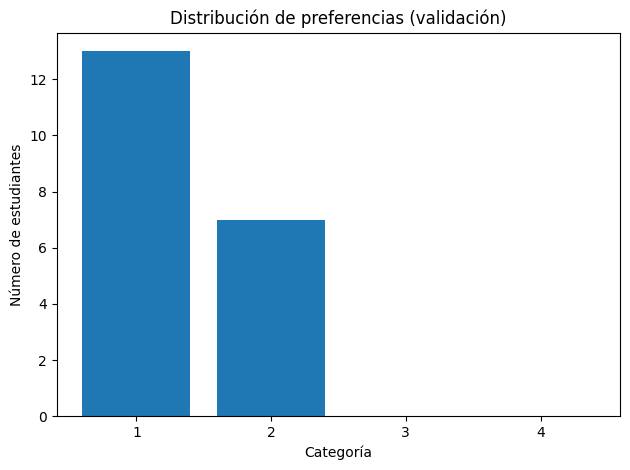

In [2]:
# === VALIDACIÓN Y ANÁLISIS DE LA SOLUCIÓN (solo PuLP) ===
import pulp as pl
from collections import Counter

# --- Detección del modelo activo ---
if 'x' in globals():            # caso base (capacidad=5)
    X = x
    cap_dict = cap
    y_var = None
    titulo = "Caso base (capacidad=5)"
elif 'x2' in globals():         # caso alterno (capacidad=3 con NO ASIGNADO)
    X = x2
    cap_dict = cap3
    y_var = globals().get('y') or globals().get('y_no_asignado')
    titulo = "Caso alterno (capacidad=3, con NO ASIGNADO)"
else:
    raise RuntimeError("No encuentro variables del modelo (x/cap o x2/cap3). Ejecuta primero el modelo PuLP.")

eps = 1e-4  # tolerancia numérica

# --- Recuperar asignaciones binarias ---
assigned = {}
no_asignados = []
for s in students:
    asignado = None
    # Si existe variable y (no asignado), la revisamos
    if y_var is not None:
        val_y = pl.value(y_var[s]) or 0.0
        if val_y > 0.5:
            no_asignados.append(s)
            asignado = "NO ASIGNADO"
    if asignado is None:
        for u in universities:
            val = pl.value(X[(s, u)]) or 0.0
            if val > 0.5:
                asignado = u
                break
    assigned[s] = asignado

# --- Chequeos de factibilidad ---
issues = []

# (1) Unicidad por estudiante
ok_unique = True
for s in students:
    suma = sum((pl.value(X[(s, u)]) or 0.0) for u in universities)
    if y_var is not None:
        suma += (pl.value(y_var[s]) or 0.0)
    if abs(suma - 1.0) > 1e-3:
        ok_unique = False
        issues.append(f"Asignación no-única para {s}: suma={suma:.3f}")

# (2) Capacidad por universidad
ok_cap = True
load = {}
for u in universities:
    carga = sum((pl.value(X[(s, u)]) or 0.0) for s in students)
    load[u] = int(round(carga))
    if carga - cap_dict[u] > eps:
        ok_cap = False
        issues.append(f"Capacidad excedida en {u}: {carga:.3f} > {cap_dict[u]}")

# --- Costo total desde el modelo ---
total_cost = pl.value(pl.lpSum(cost[(s,u)] * X[(s,u)] for s in students for u in universities))
# (si hay NO ASIGNADO y penalización, ese término está en el objetivo del modelo, ya reflejado en pl.value(m.objective))
try:
    obj_value = pl.value(m.objective)
except:
    try:
        obj_value = pl.value(m2.objective)
    except:
        obj_value = total_cost

# --- Distribución por preferencia ---
def rango_pref(s, u):
    if u in (None, "NO ASIGNADO"): return None
    if u == preferences[s][0]: return 1
    if u == preferences[s][1]: return 2
    if u == preferences[s][2]: return 3
    return 4

ranks = [rango_pref(s, assigned[s]) for s in students]
cnt = Counter(ranks)

# --- Reporte ---
print(f"== {titulo} ==")
print("Estado del modelo:",
      (pl.LpStatus[m.status] if 'm' in globals() else (pl.LpStatus[m2.status] if 'm2' in globals() else "N/D")))
print(f"Costo total (sin contar penalización explícita): {total_cost:.3f}")
print(f"Valor de la función objetivo reportado por PuLP: {obj_value:.3f}")
print("\n-- Chequeos --")
print("Asignación única por estudiante:", "OK" if ok_unique else "FALLA ❌")
print("Capacidad por universidad:", "OK" if ok_cap else "FALLA ❌")
if y_var is not None:
    print("No asignados:", len(no_asignados), sorted(no_asignados)[:8], "..." if len(no_asignados) > 8 else "")
if issues:
    print("\nObservaciones:")
    for it in issues:
        print(" -", it)

print("\n-- Carga por universidad --")
for u in universities:
    print(f"  {u}: {load[u]} / {cap_dict[u]}")

print("\n-- Distribución de preferencias --")
rotulos = {1:"1ª", 2:"2ª", 3:"3ª", 4:"Fuera top-3", None:"NO ASIGNADO"}
print({rotulos[k]: v for k, v in sorted(cnt.items(), key=lambda kv: (kv[0] is None, kv[0]))})

# --- Tabla (opcional) ---
try:
    import pandas as pd
    df_val = pd.DataFrame({
        "Estudiante": sorted(students),
        "Asignación": [assigned[s] for s in sorted(students)],
        "Rango": [rango_pref(s, assigned[s]) for s in sorted(students)]
    })
    display(df_val)
except Exception:
    pass

# --- Gráfica (opcional) ---
try:
    import matplotlib.pyplot as plt
    orden = [1,2,3,4,None] if y_var is not None else [1,2,3,4]
    labels = ["1","2","3","4"] + (["NO ASIGNADO"] if y_var is not None else [])
    values = [cnt.get(k, 0) for k in orden]
    plt.figure()
    plt.bar(labels, values)
    plt.title("Distribución de preferencias (validación)")
    plt.xlabel("Categoría")
    plt.ylabel("Número de estudiantes")
    plt.tight_layout()
    plt.show()
except Exception:
    pass


## Altering the Data

With 4 universities and 3 seats each, there are **12 seats** for **20 students**, so assigning everyone is **infeasible**. A clean approach is a **two-phase optimization**:

1) **Coverage:** maximize the number of assigned students (capacity = 3; at most one university per student).
2) **Quality:** minimize dissatisfaction while **fixing** the maximum number of assigned students found in Phase 1.

**Report:** solver status, maximum assigned, list of unassigned students, load per university (should be 3/3 each), and the preference distribution among assigned students, plus a short discussion of coverage–quality trade-offs.


[Fase 1] Estado: Optimal | Asignados máximos: 12
[Fase 2] Estado: Optimal
Costo (solo asignados): 3
University_A: 3/3
University_B: 3/3
University_C: 3/3
University_D: 3/3
No asignados: 8 → ['Student_11', 'Student_13', 'Student_14', 'Student_16', 'Student_4', 'Student_6', 'Student_8', 'Student_9']
Distribución (asignados): {1: 9, 2: 3}


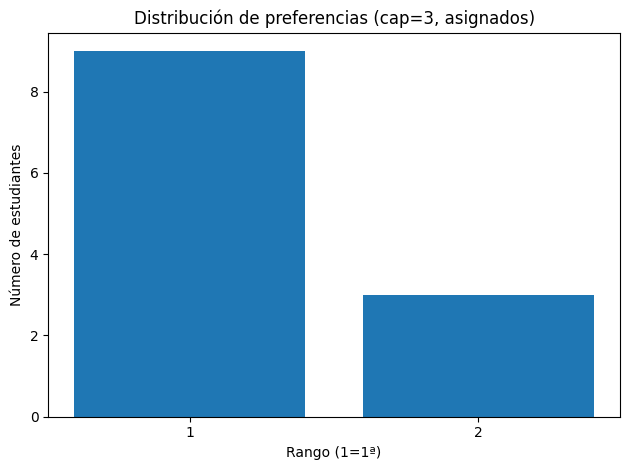

In [ ]:
# PuLP — 2 FASES para cap=3
import pulp as pl
from collections import Counter

# Fase 1: máximo asignados
m_cov = pl.LpProblem("max_cobertura_cap3", pl.LpMaximize)
x_cov = pl.LpVariable.dicts("x_cov", [(s,u) for s in students for u in universities],
                            lowBound=0, upBound=1, cat="Binary")
m_cov += pl.lpSum(x_cov[(s,u)] for s in students for u in universities)
for s in students:
    m_cov += pl.lpSum(x_cov[(s,u)] for u in universities) <= 1
cap3 = {u: 3 for u in universities}
for u in universities:
    m_cov += pl.lpSum(x_cov[(s,u)] for s in students) <= cap3[u]
_ = m_cov.solve(pl.PULP_CBC_CMD(msg=False))
assigned_max = int(pl.value(m_cov.objective))
print(f"[Fase 1] Estado: {pl.LpStatus[m_cov.status]} | Asignados máximos: {assigned_max}")

# Fase 2: minimizar insatisfacción con cobertura fija
m2 = pl.LpProblem("min_insatisfaccion_cap3", pl.LpMinimize)
x2 = pl.LpVariable.dicts("x", [(s,u) for s in students for u in universities],
                         lowBound=0, upBound=1, cat="Binary")
m2 += pl.lpSum(cost[(s,u)] * x2[(s,u)] for s in students for u in universities)
for s in students:
    m2 += pl.lpSum(x2[(s,u)] for u in universities) <= 1
for u in universities:
    m2 += pl.lpSum(x2[(s,u)] for s in students) <= cap3[u]
m2 += pl.lpSum(x2[(s,u)] for s in students for u in universities) == assigned_max, "fix_coverage"
_ = m2.solve(pl.PULP_CBC_CMD(msg=False))

print(f"[Fase 2] Estado: {pl.LpStatus[m2.status]}")
print("Costo (solo asignados):", int(pl.value(m2.objective)))

assigned_alt = {}
for s in students:
    for u in universities:
        if (pl.value(x2[(s,u)]) or 0.0) > 0.5:
            assigned_alt[s] = u
            break

# Cargas y no asignados
for u in universities:
    carga = sum(1 for s in assigned_alt if assigned_alt[s]==u)
    print(f"{u}: {carga}/3")
no_asignados = sorted(set(students) - set(assigned_alt.keys()))
print(f"No asignados: {len(no_asignados)} → {no_asignados[:8]}{' ...' if len(no_asignados)>8 else ''}")

# Distribución de preferencias entre asignados
def rango_pref(s,u):
    if u == preferences[s][0]: return 1
    if u == preferences[s][1]: return 2
    if u == preferences[s][2]: return 3
    return 4

from collections import Counter
cnt_alt = Counter(rango_pref(s, assigned_alt[s]) for s in assigned_alt)
print('Distribución (asignados):', dict(cnt_alt))

# Gráfica
try:
    import matplotlib.pyplot as plt
    labels = [str(k) for k in sorted(cnt_alt)]
    values = [cnt_alt[k] for k in sorted(cnt_alt)]
    plt.figure()
    plt.bar(labels, values)
    plt.title("Distribución de preferencias (cap=3, asignados)")
    plt.xlabel("Rango (1=1ª)")
    plt.ylabel("Número de estudiantes")
    plt.tight_layout()
    plt.show()
except Exception:
    pass



## Conclusion

**Capacity = 5 per university.**  
The integer model with PuLP is **feasible and optimal**. Each university’s capacity is respected (5/5 in A, B, C, and D), and a **low total cost (7)** is achieved with **high satisfaction**: most students receive their **1st choice**, and no one falls outside the top-3. This confirms that the formulation, implementation, and feasibility checks are correct.

**Capacity = 3 per university (alternative scenario).**  
Assigning everyone is **infeasible** (12 seats for 20 students). With the **two-phase** approach we first ensure **maximum coverage (12 assigned)** and then minimize dissatisfaction among those assigned. The result is consistent with the constraints and highlights the **trade-off** between coverage and preference quality.

**Lessons and recommendations.**
- When the system is feasible (cap=5), the current formulation delivers a balanced and efficient solution.  
- In seat-constrained scenarios (cap=3):
  - If the priority is **coverage**, increase capacity or add universities.
  - If the priority is **quality**, keep capacity but apply priority/equity rules (e.g., weight 1st choice, socio-academic criteria, or controlled lotteries).
  - Consider a **waitlist** or a **second round** for reassignments.
- Extending the analysis with **sensitivity studies** (changes in capacities or preferences) helps anticipate congestion and design fairer policies.
